In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import boston_housing
from keras import layers, models, optimizers
import matplotlib.pyplot as plt

Modelo de Regresion Lienal LR en ingles

In [ ]:
(train_data,train_labels),(test_data,test_labels) = boston_housing.load_data()

In [ ]:
train_data.shape
# 404 ejemplos con 13 caracteristicas

In [ ]:
train_labels.shape

(404,)

**Normalizacion de Data**

Normalizacion sencilla restar la media y dividir por la desviacion estandar

In [ ]:
mean = train_data.mean(axis=0)
train_data = train_data - mean
std = train_data.std(axis=0)

train_data = train_data/std

# por etica solo se usa la mean y std de la data de entrenamiento
# para evaluar correctamente el algoritmo y que vea por primera vez los datos de test
# cuando se le inyecte dicha data
test_data = test_data - mean
test_data = test_data / std

Crear una funcion que entregue modelos de datos
para evaluar sobre un **K Fold validation** haciendo **cross validation** para ir rotando el set de validacion en todo el set de entrenamiento

In [ ]:
def build_model_regression(lr_var,input_data):
  model = models.Sequential()
  model.add(layers.Dense(32,activation="relu",input_shape=(input_data,), ))
  model.add(layers.Dense(32,activation="relu",))
  # al ser un valor continuo (precio de algo) el layer de salida no requiere una funcion de activacion
  # y solo necesita 1 neurona en dicho layer
  model.add(layers.Dense(1))

  #compilar modelo indicando el Learning rate en el optimizador
  model.compile(optimizer=optimizers.RMSprop(learning_rate=lr_var),
                loss="mse",
                metrics=["mae"])
  return model

K Fold Validation

In [ ]:
k=6
num_val_samples=len(train_data)//k

num_epoch = 250
all_history=[]

In [ ]:
for n in range(k):
  
  # la validacion sera 1 solo tramo de la data 
  val_data=train_data[n*num_val_samples:(n+1) * num_val_samples] 
  val_targets=train_labels[n*num_val_samples:(n+1) * num_val_samples]

  # el entrenamineto contendra el resto de tramos de la data
  # concatenar data que no es de validacion
  partial_train_data = np.concatenate(
      [train_data[:n*num_val_samples],
       train_data[(n+1)*num_val_samples:]
      ],axis=0)
  partial_train_targets = np.concatenate(
      [train_labels[:n*num_val_samples],
       train_labels[(n+1)*num_val_samples:]
      ],axis=0)
  
  model = build_model_regression(0.0005,13)
  history = model.fit(partial_train_data, partial_train_targets, epochs=num_epoch, batch_size =24, 
                        validation_data = (val_data, val_targets),
                        verbose=0)
  
  print(f"fold: {n}")
  
  # guardar el error en la validacion de MAE
  all_history.append(history.history["val_mae"])

fold: 0
fold: 1
fold: 2
fold: 3
fold: 4
fold: 5


El all History contiene 4 lotes de 80 respuestas cada uno

In [ ]:
all_history

In [ ]:
len(all_history[0])

**Analisis de resultados de la RED**

In [ ]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

In [ ]:
all_mean_avg

Al tener una muy mala prediccion inicial el mae es muy alto

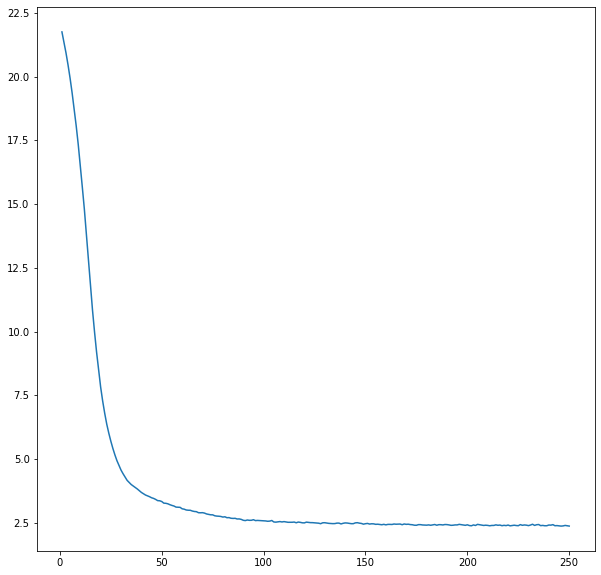

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg)+1),all_mae_avg)
plt.show()

Para ver mas a detalle se ve a partir de un valor que no sea el inicial

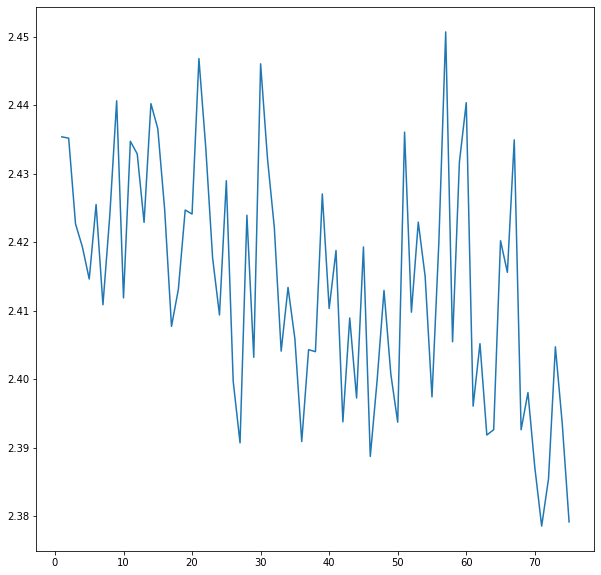

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[175:])+1),all_mae_avg[175:])
plt.show()

Siempre es importante graficar los resultados del modelo para poder determinar que tanto se ajusta a los datos y poder ir optimizando el modelo

In [ ]:
model.evaluate(test_data,test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 20.0050 - mae: 2.8716


[20.00497817993164, 2.8715903759002686]

Resumen de LR:

*   Escalar variables
*   Trabajar con K Fold Validation
*   Usar el MAE para metrica de exito
*   Y funcion de perdida MSE
*   La ultima capa no requiere una funcion de activacion ya que en esta prediccion se requiere un valor continuo



Resumen del curso

que funcion utilizar:

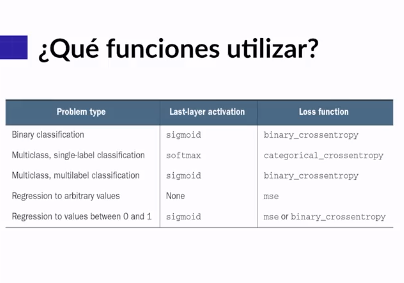

Buscar

*   CNN, NLP
*   Sequences
*   Gans
*   Hiper Parameters tuning
*   LTSM
*   Tensorboard


